# Exploratory Data Analysis
---
**Author:** Jacob Redmon  
**Version:** 1.0  
**Semester:** Spring 2021  
**Summary:**  

The goal of this project is to use Pandas/Matplotlib/Seaborn to clean up a data set and explore it.

## I. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## II. Data Set Description

In [2]:
df = pd.read_csv('movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

The columns are not in any particular, so I'll sort them in a more meaningful way.

In [5]:
df = df[[
    'movie_title',
    'title_year',
    'country',
    'language',
    'budget',
    'gross',
    'imdb_score',
    'duration',
    'genres',
    'plot_keywords',
    'color',
    'content_rating',
    'aspect_ratio',
    'facenumber_in_poster',
    'num_critic_for_reviews',
    'num_user_for_reviews',
    'num_voted_users',
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'director_facebook_likes',
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'cast_total_facebook_likes',
    'movie_facebook_likes',
    'movie_imdb_link'
]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   country                    5038 non-null   object 
 3   language                   5031 non-null   object 
 4   budget                     4551 non-null   float64
 5   gross                      4159 non-null   float64
 6   imdb_score                 5043 non-null   float64
 7   duration                   5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   plot_keywords              4890 non-null   object 
 10  color                      5024 non-null   object 
 11  content_rating             4740 non-null   object 
 12  aspect_ratio               4714 non-null   float64
 13  facenumber_in_poster       5030 non-null   float

There are many columns here that have missing data, I will remove all rows with missing data in any column and still be left with a sizeable data set. I will also reset the index since it is no longer continuous after dropping the missing data. The `aspect_ratio` column was messed up in the original data set as it should be a String but it is a float and now no longer makes sense, so I will drop the whole column.

In [7]:
dfa = df.dropna()
dfa = dfa.drop(columns='aspect_ratio')
dfa = dfa.reset_index(drop=True)
len(dfa.index)

3756

In [8]:
dfa.dtypes

movie_title                   object
title_year                   float64
country                       object
language                      object
budget                       float64
gross                        float64
imdb_score                   float64
duration                     float64
genres                        object
plot_keywords                 object
color                         object
content_rating                object
facenumber_in_poster         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
director_facebook_likes      float64
actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
cast_total_facebook_likes      int64
movie_facebook_likes           int64
movie_imdb_link               object
d

The `title_year` column is currently in a String, so I will change it to int64. I will also change the columns where decimals are irrelevant from float to int.

In [9]:
dfa['title_year'] = pd.to_datetime(dfa['title_year'], format='%Y').dt.year
dfa['facenumber_in_poster'] = dfa['facenumber_in_poster'].astype(int)
dfa['num_critic_for_reviews'] = dfa['num_critic_for_reviews'].astype(int)
dfa['num_user_for_reviews'] = dfa['num_user_for_reviews'].astype(int)
dfa['director_facebook_likes'] = dfa['director_facebook_likes'].astype(int)
dfa['actor_1_facebook_likes'] = dfa['actor_1_facebook_likes'].astype(int)
dfa['actor_2_facebook_likes'] = dfa['actor_2_facebook_likes'].astype(int)
dfa['actor_3_facebook_likes'] = dfa['actor_3_facebook_likes'].astype(int)

The `genres` column is too verbose, so I will create an additional column that takes just the first genre in the list, which is unfortunately in alphabetical order, so it may nor be the most accurate.

In [34]:
dfa['genres_first'] = dfa.genres.apply(lambda x: x.split('|')[0] if '|' in x else x)

In [51]:
dfa.to_csv('cleaned_movies.csv')

## III. Data Set Summary Statistics

Generate the Summary Statistics table.

In [35]:
dfb = dfa.describe().T
dfb

,count,mean,std,min,25%,50%,75%,max
title_year,3756.0,2.002977e+03,9.888108e+00,1927.0,1999.00,2004.0,2010.00,2.016000e+03
budget,3756.0,4.623685e+07,2.260103e+08,218.0,10000000.00,25000000.0,50000000.00,1.221550e+10
gross,3756.0,5.261282e+07,7.031787e+07,162.0,8270232.75,30093107.0,66881940.75,7.605058e+08
imdb_score,3756.0,6.465282e+00,1.056247e+00,1.6,5.90,6.6,7.20,9.300000e+00
duration,3756.0,1.102580e+02,2.264672e+01,37.0,96.00,106.0,120.00,3.300000e+02
facenumber_in_poster,3756.0,1.377263e+00,2.041541e+00,0.0,0.00,1.0,2.00,4.300000e+01
num_critic_for_reviews,3756.0,1.673783e+02,1.234520e+02,2.0,77.00,138.5,224.00,8.130000e+02
num_user_for_reviews,3756.0,3.368432e+02,4.112274e+02,4.0,110.00,210.0,398.25,5.060000e+03
num_voted_users,3756.0,1.058267e+05,1.520354e+05,91.0,19667.00,53973.5,128602.00,1.689764e+06
director_facebook_likes,3756.0,8.073365e+02,3.068172e+03,0.0,11.00,64.0,235.00,2.300000e+04


Generate the Proportions tables for the catergorical variables.

Function to calculate the proportion for categorical variables.

In [36]:
def proportion(x):
    x = x / 3756 * 100
    return x

Function to generate CSV files for proportion tables for categorical variables.

In [52]:
def prop_table(x):
    dfc = dfa[x].groupby(dfa[x]).count().to_frame()
    dfc.insert(1, 'proportion', dfc[x].apply(proportion))
    dfc.to_csv('proportion_tables/'+ x + '_proportion.csv')
    return dfc

In [53]:
categorical = ['country', 'language', 'genres', 'plot_keywords', 'color', 
               'content_rating', 'director_name', 'actor_1_name', 'actor_2_name',
               'actor_3_name', 'genres_first']

In [54]:
for x in categorical:
    prop_table(x)

Generate a correlation matrix for all continuous variables

In [46]:
dfd = dfa[['title_year', 'budget', 'gross', 'imdb_score', 'duration', 'facenumber_in_poster',
    'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users',
    'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
    'actor_3_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']].corr()

In [47]:
dfd.to_csv('correlation_matrix.csv')

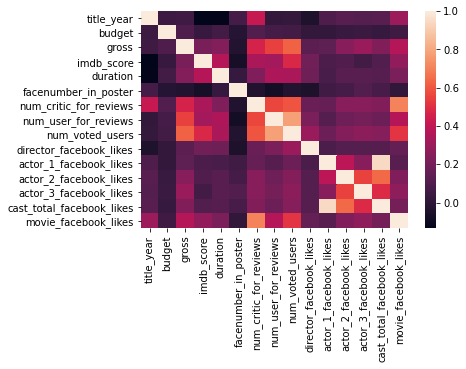

In [48]:
heatmap = sns.heatmap(dfd)
fig = heatmap.get_figure()

In [18]:
fig.savefig('corr_heatmap.png')

## IV. Data Set Graphical Exploration

### _A. Distributions_

array([[<AxesSubplot:title={'center':'title_year'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'imdb_score'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:>]], dtype=object)

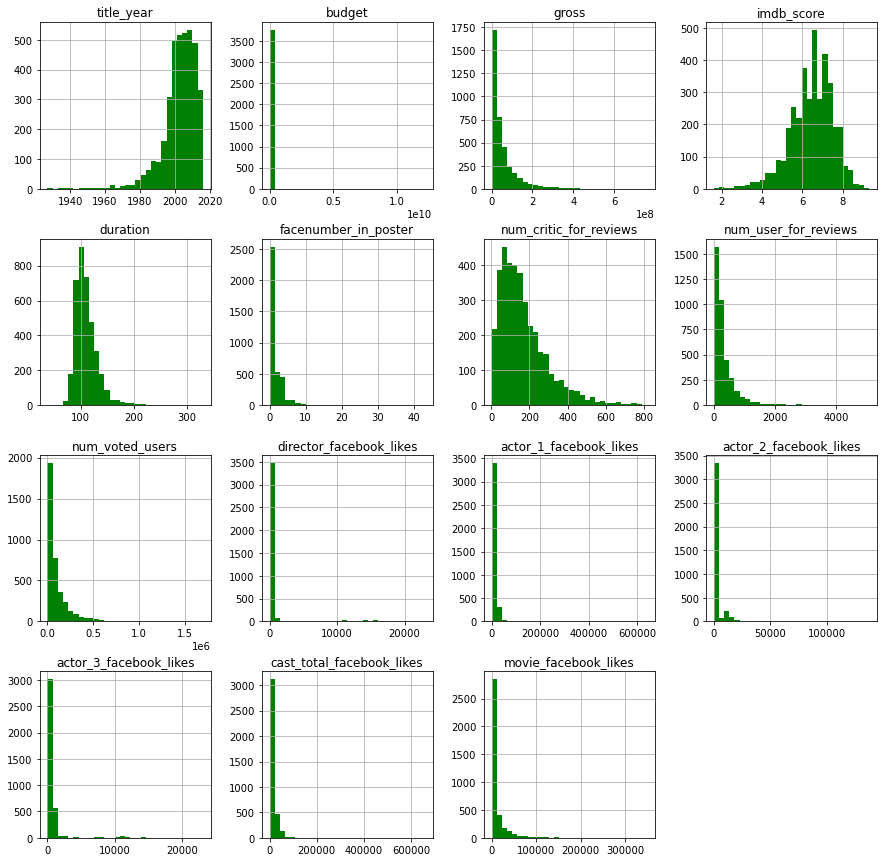

In [49]:
dfa.hist(bins=30,figsize=(15,15),color='g')

### _B. Scatterplots / Pairwise Plots_

<AxesSubplot:xlabel='duration', ylabel='imdb_score'>

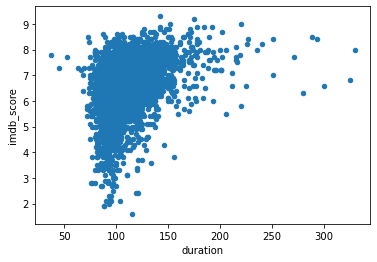

In [50]:
dfa.loc[:, ['duration', 'imdb_score']].plot.scatter(x='duration', y='imdb_score')

### _C. Barcharts_

<AxesSubplot:xlabel='country'>

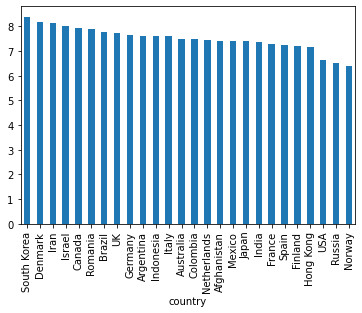

In [29]:
non_english_movies = dfa.loc[(dfa.language != 'English') & (dfa.budget < 10000000.0)]
country_scores = non_english_movies.groupby('country').imdb_score.mean()
country_scores.sort_values(ascending=False).plot.bar()

### _D. Other Plots_